# PLot the Khon-Shan eigenvalues and localization using  (IOWs)


Number of bands (For each spin):                                           
   NBAND = 896                                         
                                                           
Number of k-points                                         
   NKPOINT = 1                                         
                                                           
Number of occupied bands (spin up)                         
   NBAND-OCC-UP = 596                         
                                                           
Number of unoccupied bands (spin up)                       
   NBAND-UNOCC-UP = 300       

Number of partial occupied bands (spin up)                       
    NBAND-PAR-OCC-UP = 0             
                                                           
Number of occupied bands (spin down)                       
   NBAND-OCC-DOWN = 594                     
                                                           
Number of unoccupied bands (spin down)     

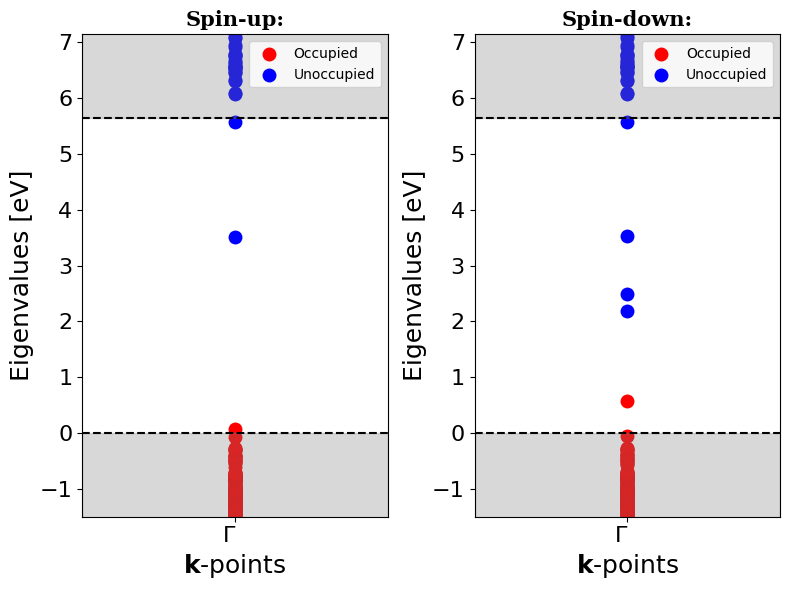

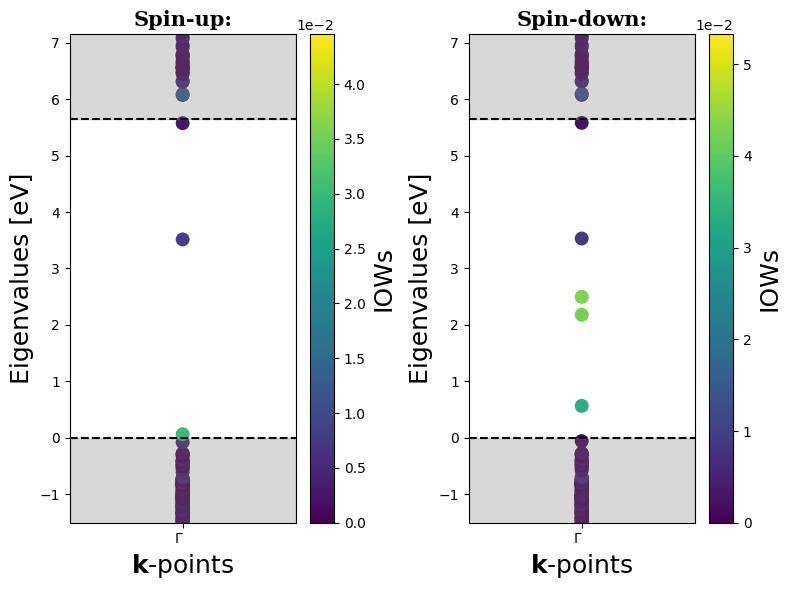

In [ ]:
from VaspDefAnalysis.plotter.plot_KS_eigenvalues import PlotKohnShamEigenvalue
from VaspDefAnalysis.plotter.plot_localization_factor import PlotLocalizedStates


# The VBM and CBM (PBE)
#VBM = 5.9732   # [eV]
#CBM = 10.0299  # [eV]

# The VBM and CBM (HSE06) 
VBM = 5.3092    # [eV]
CBM = 10.9541   # [eV]

# Path to perfect struccture without relaxing
perfect_structure_path =  '/home/luis/master_thesis_uio/thesis_project/output_from_vasp_saga/project_AlN/calcualtion_steps/supercell/hybrid-hse06-5x5x3/defect/perfect/POSCAR'

# Path to the defect structure without relaxing
defect_structure_path = '/home/luis/master_thesis_uio/thesis_project/output_from_vasp_saga/project_AlN/calcualtion_steps/supercell/hybrid-hse06-5x5x3/defect/V_N-V_Al/POSCAR-V_N-V_Al.vasp'

# Path to the vasprun.xml (VASP) file of the defect calculation 
defect_vasprun_path = '/home/luis/master_thesis_uio/thesis_project/output_from_vasp_saga/project_AlN/calcualtion_steps/supercell/hybrid-hse06-5x5x3/defect/V_N-V_Al/V_N-V_Al_+2/vasprun.xml'

# PLot the eigenvalues
fig_eig = PlotKohnShamEigenvalue.get_plot_KS_eigenvalues(vasprun_path=defect_vasprun_path,
                                                         VBM=VBM,
                                                         CBM=CBM,
                                                         #show_band_index=True,
                                                         #band_indix_label_limit=(-2,-1),
                                                         #y_limit=(-1,-2)
                                                         #layout="vertical",
                                                         #figsize=(8,6),
                                                         labelsize=16,
                                                         )

# Radius to consider surrounding neighbors of the defect (to select the first neighbor, it should be set slightly larger than the bonding length. For example, a radius of 2.0 Å for AlN, where the bonding length is approximately 1.87 Å).
radius = 2.0    # [Å] 

# Plot the localization factor
fig_loc = PlotLocalizedStates.get_plot_LS_using_IOWs(perfect_structure_path=perfect_structure_path,
                                                     defect_structure_path=defect_structure_path,
                                                     defect_vasprun_path=defect_vasprun_path,
                                                     radius=radius,
                                                     VBM=VBM,
                                                     CBM=CBM,
                                                     #show_band_index=True,
                                                     #band_indix_label_limit=(0.0,4.5),
                                                     #y_limit=(0.0,1.5)
                                                     #figsize=(8,6),
                                                     #layout="vertical",
                                                     #scatter_settings= {"cmap": "cividis"})
                                                     #scatter_settings= {"cmap": "Reds"})
                                                     #scatter_settings= {"cmap": "Blues"}
                                                     labelsize=16,
                                                     )
# Kohn-Shan  eigenvalues analysis 
from VaspDefAnalysis.defect.KS_eigenvalues_analysis import EigenvaluesAnalysis
eigenvalies_analysis = EigenvaluesAnalysis(vasprun_path=defect_vasprun_path)
electronic_state_band_info = eigenvalies_analysis.get_electorinic_state_band_inf()
print(electronic_state_band_info)

In [35]:
import os
import matplotlib.pyplot as plt

# Extract the directory where the vasprun.xml is located
directory = os.path.dirname(defect_vasprun_path)

# Extract the name of the parent directory
parent_dir_name = os.path.basename(directory)

# Define the output file path (you can change the file name if necessary)
path_to_save_eig = os.path.join(directory,f"Kohn_Sham_eigenvalues_{parent_dir_name}.png")
path_to_save_loc = os.path.join(directory, f"state_localization_IOWs_{parent_dir_name}.png")
# Save the plot in the same directory as the vasprun.xml
fig_eig.savefig(path_to_save_eig,dpi=400)

fig_loc.savefig(path_to_save_loc,dpi=400)

# Define the file path
file_path = os.path.join(directory,f"electronic_state_band_info{parent_dir_name}.txt")

# Write the output to a text file
try:
    with open(file_path, "w") as file:
        file.write(str(electronic_state_band_info))  
    print("File written successfully.")
except Exception as e:
    print(f"Error writing file: {e}")

# Optionally, show the plot (if needed)
#plt.figure(fig_eig)
#plt.show(fig)

File written successfully.


# Localization state using  IPR

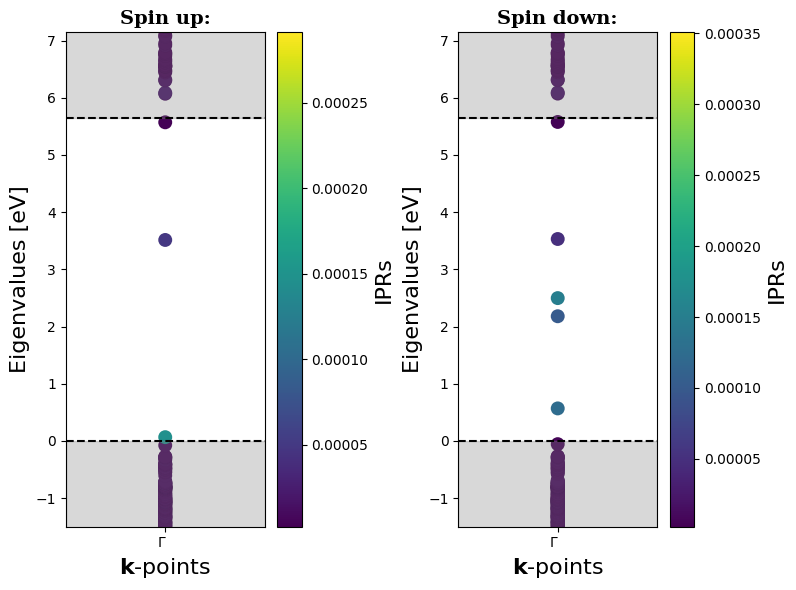

In [36]:
from VaspDefAnalysis.plotter.plot_localization_factor import PlotLocalizedStates

# The VBM and CBM (PBE)
#VBM = 5.9732   # [eV]
#CBM = 10.0299  # [eV]

# The VBM and CBM (HSE06) 
VBM = 5.3092    # [eV]
CBM = 10.9541   # [eV]

# Path to the WAVECAR file
WAVECAR_path = "/home/luis/master_thesis_uio/thesis_project/output_from_vasp_saga/project_AlN/calcualtion_steps/supercell/hybrid-hse06-5x5x3/defect/V_N-V_Al/V_N-V_Al_+2/WAVECAR"

# Path to the vasprun.xml file  
vasprun_path = "/home/luis/master_thesis_uio/thesis_project/output_from_vasp_saga/project_AlN/calcualtion_steps/supercell/hybrid-hse06-5x5x3/defect/V_N-V_Al/V_N-V_Al_+2/vasprun.xml"

# Plot the localization factor
fig_loc = PlotLocalizedStates.get_plot_LS_using_IPR(WAVECAR_path=WAVECAR_path,
                                                    vasprun_path=vasprun_path,
                                                    VBM=VBM,
                                                    CBM=CBM,
                                                    lgamma=True,
                                                    #show_band_index=True,
                                                    #band_index_expand_between_VBM_CBM=(0.1,0.5),
                                                    #figsize=(10,6)
                                                    #layout="vertical",
                                                    #y_limit=(-3,8)
                                                    #scatter_settings= {"cmap": "cividis"})
                                                    #scatter_settings= {"cmap": "Reds"})
                                                    #scatter_settings= {"cmap": "Blues"}
                                                    )


In [37]:
import os
import matplotlib.pyplot as plt

# Extract the directory where the vasprun.xml is located
directory = os.path.dirname(vasprun_path)

# Extract the name of the parent directory
parent_dir_name = os.path.basename(directory)

# Define the output file path (you can change the file name if necessary)
path_to_save_loc = os.path.join(directory, f"state_localization_IPR_{parent_dir_name}.png")
# Save the plot in the same directory as the vasprun.xml
fig_loc.savefig(path_to_save_loc,dpi=400)

# Optionally, show the plot (if needed)
#plt.figure(fig_eig)
#plt.show(fig)

# Visulizatio the density of the localizad band 

In [ ]:
from vaspwfc import vaspwfc
import numpy as np

# Load the WAVECAR file
pswfc = vaspwfc('/home/luis/Downloads/WAVECAR', lgamma=True, gamma_half='x')

# Define k-point and multiple band indices
ikpt = 1  # Choose the k-point index
bands = range(597, 600)  # Adjust the band range as needed
spins = [1, 2]  # Spin components: 1 (up), 2 (down)

# Loop over each spin component
for ispin in spins:
    print(f"Processing spin {ispin} at k-point {ikpt}")

    # Initialize total density array
    total_density = None

    # Loop over each band index
    for iband in bands:
        print(f"Processing band {iband}")

        # Extract the KS wavefunction in real space (complex)
        phi = pswfc.get_ps_wfc(ikpt=ikpt, iband=iband, ispin=ispin, ngrid=pswfc._ngrid * 2)

        # Compute the electron density (modulus squared)
        density = np.abs(phi) ** 2  # |ψ|² = Re(ψ)² + Im(ψ)²

        # Sum over bands
        if total_density is None:
            total_density = density  # First band initializes the array
        else:
            total_density += density  # Add densities for other bands

# Save the total density to a VESTA-readable format
#filename = f'/home/luis/Downloads/total_density_spin_{ispin}.vesta'

path_to_save_loc = os.path.join(directory, f"VESTA_density_for_localized_bands_state_{parent_dir_name}")
pswfc.save2vesta(total_density, poscar='/home/luis/Downloads/POSCAR',prefix=path_to_save_loc)
#print(f"Saved total density for spin {ispin} as {filename}")


Processing spin 1 at k-point 1
Processing band 597
Processing band 598
Processing band 599
Processing spin 2 at k-point 1
Processing band 597
Processing band 598
Processing band 599
